In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

In [2]:
X = np.loadtxt('./data/data_clustering.txt', delimiter = ',')

In [3]:
bandwidth_X = estimate_bandwidth(X, quantile = 0.1, n_samples = len(X))

In [4]:
meanshift_model = MeanShift(bandwidth = bandwidth_X, bin_seeding = True)
meanshift_model.fit(X)

MeanShift(bandwidth=1.3044799765090382, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [5]:
cluster_centers = meanshift_model.cluster_centers_
print('Center of clusters : ', cluster_centers)

Center of clusters :  [[ 2.95568966  1.95775862]
 [ 7.17563636  2.18145455]
 [ 2.17603774  8.03283019]
 [ 5.97960784  8.39078431]
 [ 4.81044444  5.07111111]]


In [6]:
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print('Number of clusters in input data = ', num_clusters)

Number of clusters in input data =  5


In [7]:
plt.figure()

In [8]:
markers = 'o*xvs'

In [9]:
for i, marker in zip(range(num_clusters), markers):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], marker = marker, color = 'black')
    
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker = 'o',
            markerfacecolor = 'black', markeredgecolor = 'black', markersize = 15)

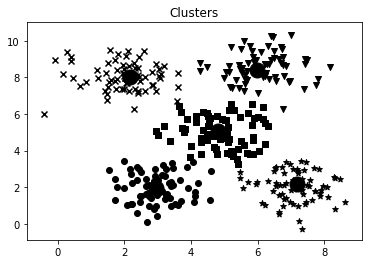

In [10]:
plt.title('Clusters')
plt.show()